In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/btc_6h.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Handle missing values
df = df.dropna()  # For simplicity, you may use other strategies like interpolation or filling missing values

# Check for missing values after handling
print("Missing values after preprocessing:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  5959 non-null   object 
 1   open      5959 non-null   float64
 2   high      5959 non-null   float64
 3   low       5959 non-null   float64
 4   close     5959 non-null   float64
 5   volume    5959 non-null   float64
dtypes: float64(5), object(1)
memory usage: 279.5+ KB
None
              datetime      open      high       low     close       volume
0  2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182
1  2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392
2  2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747
3  2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523
4  2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564
Missing values before preprocessing:
datetime    0
open        0
hi

In [ ]:
# Convert 'Date' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert numerical columns to appropriate numeric types
numeric_cols = ['close', 'open', 'high', 'low']
# df[numeric_cols] = df[numeric_cols].astype(str).apply(lambda x: x.str.replace(',', ''), axis=1)

# Convert 'Vol.' to numeric, handle 'K' and 'M' suffixes
# df['volume'] = df['volume'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Convert 'Change %' to numeric
# df['Change %'] = df['Change %'].str.rstrip('%').astype('float') / 100.0

# Display the updated dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5959 non-null   datetime64[ns]
 1   open      5959 non-null   float64       
 2   high      5959 non-null   float64       
 3   low       5959 non-null   float64       
 4   close     5959 non-null   float64       
 5   volume    5959 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 279.5 KB
None
             datetime      open      high       low     close       volume
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564


In [ ]:
df['Change %'] = (df['close'] - df['open']) / df['open'] * 100
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5959 non-null   datetime64[ns]
 1   open      5959 non-null   float64       
 2   high      5959 non-null   float64       
 3   low       5959 non-null   float64       
 4   close     5959 non-null   float64       
 5   volume    5959 non-null   float64       
 6   Change %  5959 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 326.0 KB
None
             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  1

In [ ]:
# Simple Moving Average (SMA) Crossover Strategy
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()

# Generate signals based on SMA crossovers
df['Signal'] = 0  # 0 for no signal
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # 1 for buy signal
df.loc[df['SMA_50'] < df['SMA_200'], 'Signal'] = -1  # -1 for sell signal

# Display the updated dataset with SMA signals
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %  SMA_50  SMA_200  Signal  
0 -1.142199     NaN      NaN       0  
1 -2.352020     NaN      NaN       0  
2 -1.501903     NaN      NaN       0  
3  2.860807     NaN      NaN       0  
4 -1.608186     NaN      NaN       0  


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already loaded the dataset
# If not, load the dataset as mentioned before

# Convert 'Date' to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# Create lag features for 'Price'
df['Price_Lag_1'] = df['close'].shift(1)
df['Price_Lag_2'] = df['close'].shift(2)

# Create percentage change features
df['Price_Pct_Change'] = df['close'].pct_change()
df['Volume_Pct_Change'] = df['volume'].pct_change()

# Create moving averages
df['Price_MA_7'] = df['close'].rolling(window=7).mean()
df['Price_MA_14'] = df['close'].rolling(window=14).mean()

# Create a simple volatility measure
df['Price_Volatility'] = df['Price_Pct_Change'].rolling(window=7).std()

# Fill null values using appropriate methods
# Assuming you want to fill missing values in the lag features and moving averages with 0
df[['Price_Lag_1', 'Price_Lag_2', 'Price_MA_7', 'Price_MA_14']] = df[['Price_Lag_1', 'Price_Lag_2', 'Price_MA_7', 'Price_MA_14']].fillna(0)

# Assuming you want to fill missing values in the percentage change features with the mean
df['Price_Pct_Change'] = df['Price_Pct_Change'].fillna(df['Price_Pct_Change'].mean())
df['Volume_Pct_Change'] = df['Volume_Pct_Change'].fillna(df['Volume_Pct_Change'].mean())

# Assuming you want to fill missing values in volatility with the standard deviation
df['Price_Volatility'] = df['Price_Volatility'].fillna(df['Price_Pct_Change'].rolling(window=7).std())

# Display the updated dataset after handling null values
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %  SMA_50  SMA_200  Signal  Price_Lag_1  Price_Lag_2  \
0 -1.142199     NaN      NaN       0         0.00         0.00   
1 -2.352020     NaN      NaN       0     13558.99         0.00   
2 -1.501903     NaN      NaN       0     13220.56     13558.99   
3  2.860807     NaN      NaN       0     13022.00     13220.56   
4 -1.608186     NaN      NaN       0     13380.00     13022.00   

   Price_Pct_Change  Volume_Pct_Change  Price_MA_7  Price_MA_14  \
0          0.000369           0.129689         0.0          0.0   


In [ ]:
import math
df['log_Price'] = df['close'].apply(lambda x: math.log(x))

# Display the dataset after transformations
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %  SMA_50  SMA_200  Signal  Price_Lag_1  Price_Lag_2  \
0 -1.142199     NaN      NaN       0         0.00         0.00   
1 -2.352020     NaN      NaN       0     13558.99         0.00   
2 -1.501903     NaN      NaN       0     13220.56     13558.99   
3  2.860807     NaN      NaN       0     13022.00     13220.56   
4 -1.608186     NaN      NaN       0     13380.00     13022.00   

   Price_Pct_Change  Volume_Pct_Change  Price_MA_7  Price_MA_14  \
0          0.000369           0.129689         0.0          0.0   


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have already loaded the dataset
# If not, load the dataset as mentioned before

# Convert 'Date' to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# Create lag features for 'Price'
df['Price_Lag_1'] = df['close'].shift(1)
df['Price_Lag_2'] = df['close'].shift(2)

# Create percentage change features
df['Price_Pct_Change'] = df['close'].pct_change()
df['Volume_Pct_Change'] = df['volume'].pct_change()

# Create moving averages
df['Price_MA_7'] = df['close'].rolling(window=7).mean()
df['Price_MA_14'] = df['close'].rolling(window=14).mean()

# Calculate Price Volatility
# Assuming you want to use a rolling window of 7 days for standard deviation
df['Price_Volatility'] = df['Price_Pct_Change'].rolling(window=7, min_periods=1).std()

# Display the updated dataset after handling null values and calculating Price Volatility
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %  SMA_50  SMA_200  Signal  Price_Lag_1  Price_Lag_2  \
0 -1.142199     NaN      NaN       0          NaN          NaN   
1 -2.352020     NaN      NaN       0     13558.99          NaN   
2 -1.501903     NaN      NaN       0     13220.56     13558.99   
3  2.860807     NaN      NaN       0     13022.00     13220.56   
4 -1.608186     NaN      NaN       0     13380.00     13022.00   

   Price_Pct_Change  Volume_Pct_Change  Price_MA_7  Price_MA_14  \
0               NaN                NaN         NaN          NaN   


In [ ]:
# Create moving averages with min_periods parameter
df['Price_MA_7'] = df['close'].rolling(window=7, min_periods=1).mean()
df['Price_MA_14'] = df['close'].rolling(window=14, min_periods=1).mean()

# Display the updated dataset after handling null values and calculating Price Volatility, MA_7, and MA_14
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %  SMA_50  SMA_200  Signal  Price_Lag_1  Price_Lag_2  \
0 -1.142199     NaN      NaN       0          NaN          NaN   
1 -2.352020     NaN      NaN       0     13558.99          NaN   
2 -1.501903     NaN      NaN       0     13220.56     13558.99   
3  2.860807     NaN      NaN       0     13022.00     13220.56   
4 -1.608186     NaN      NaN       0     13380.00     13022.00   

   Price_Pct_Change  Volume_Pct_Change    Price_MA_7   Price_MA_14  \
0               NaN                NaN  13558.990000  13558.9900

In [ ]:
# Simple Moving Average (SMA) Crossover Strategy
df['SMA_50'] = df['close'].rolling(window=50, min_periods=1).mean()
df['SMA_200'] = df['close'].rolling(window=200, min_periods=1).mean()

# Generate signals based on SMA crossovers
df['Signal'] = 0  # 0 for no signal
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # 1 for buy signal
df.loc[df['SMA_50'] < df['SMA_200'], 'Signal'] = -1  # -1 for sell signal

# Display the updated dataset with SMA signals
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %        SMA_50       SMA_200  Signal  Price_Lag_1  Price_Lag_2  \
0 -1.142199  13558.990000  13558.990000       0          NaN          NaN   
1 -2.352020  13389.775000  13389.775000       0     13558.99          NaN   
2 -1.501903  13267.183333  13267.183333       0     13220.56     13558.99   
3  2.860807  13295.387500  13295.387500       0     13022.00     13220.56   
4 -1.608186  13269.700000  13269.700000       0     13380.00     13022.00   

   Price_Pct_Change  Volume_Pct_Change    Price_MA_7   Price_MA_14  

In [ ]:
# Display the null values in the final dataset
print("Null values in the final dataset:")
print(df.isnull().sum())

# Replace null values with median
df = df.fillna(df.mean())

# Display the updated dataset after replacing null values with median
print("\nUpdated dataset after replacing null values with median:")
print(df.head())

Null values in the final dataset:
datetime             0
open                 0
high                 0
low                  0
close                0
volume               0
Change %             0
SMA_50               0
SMA_200              0
Signal               0
Price_Lag_1          1
Price_Lag_2          2
Price_Pct_Change     1
Volume_Pct_Change    1
Price_MA_7           0
Price_MA_14          0
Price_Volatility     2
log_Price            0
dtype: int64

Updated dataset after replacing null values with median:
             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change % 

<ipython-input-127-e8ed0c9ed137>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [ ]:
# Log transformation of 'Price'
df['log_Price'] = df['close'].apply(lambda x: math.log(x))

# Display the updated dataset after feature engineering
print(df.head())

             datetime      open      high       low     close       volume  \
0 2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182   
1 2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392   
2 2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747   
3 2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523   
4 2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564   

   Change %        SMA_50       SMA_200  Signal   Price_Lag_1   Price_Lag_2  \
0 -1.142199  13558.990000  13558.990000       0  18798.084824  18794.881252   
1 -2.352020  13389.775000  13389.775000       0  13558.990000  18794.881252   
2 -1.501903  13267.183333  13267.183333       0  13220.560000  13558.990000   
3  2.860807  13295.387500  13295.387500       0  13022.000000  13220.560000   
4 -1.608186  13269.700000  13269.700000       0  13380.000000  13022.000000   

   Price_Pct_Change  Volume_Pct_Change    Price_MA_7   P

In [ ]:
df['Date'] = df['datetime'].dt.date
df['Time'] = df['datetime'].dt.time
df=df.drop(['datetime'],axis=1)

df.head()

,open,high,low,close,volume,Change %,SMA_50,SMA_200,Signal,Price_Lag_1,Price_Lag_2,Price_Pct_Change,Volume_Pct_Change,Price_MA_7,Price_MA_14,Price_Volatility,log_Price,Date,Time
0,13715.65,13715.65,13155.38,13558.99,2421.241182,-1.142199,13558.990000,13558.990000,0,18798.084824,18794.881252,0.000369,0.129689,13558.990000,13558.990000,0.016557,9.514805,2018-01-01,05:30:00
1,13539.00,13818.55,13001.13,13220.56,1876.934392,-2.352020,13389.775000,13389.775000,0,13558.990000,18794.881252,-0.024960,-0.224805,13389.775000,13389.775000,0.016557,9.489528,2018-01-01,11:30:00
2,13220.56,13330.00,12750.00,13022.00,2427.898747,-1.501903,13267.183333,13267.183333,0,13220.560000,13558.990000,-0.015019,0.293545,13267.183333,13267.183333,0.007029,9.474396,2018-01-01,17:30:00
3,13007.87,13599.70,12940.00,13380.00,1883.841523,2.860807,13295.387500,13295.387500,0,13022.000000,13220.560000,0.027492,-0.224086,13295.387500,13295.387500,0.027860,9.501516,2018-01-01,23:30:00
4,13382.16,13850.00,12890.02,13166.95,3957.954564,-1.608186,13269.700000,13269.700000,0,13380.000000,13022.000000,-0.015923,1.101002,13269.700000,13269.700000,0.023496,9.485465,2018-01-02,05:30:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Assuming you have already loaded and preprocessed the dataset
# If not, load and preprocess the dataset as mentioned before

# Feature engineering or selection based on the problem requirements
features = [
    'Price_Lag_1',
    'Price_Lag_2',
    'Price_Pct_Change',
    'Volume_Pct_Change',
    'Price_MA_7',
    'Price_MA_14',
    'Price_Volatility',
    'SMA_50',
    'SMA_200',
    'log_Price'
]

# Train-test split with random state
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Ensure 'close' column is of type float32
train['close'] = train['close'].astype('float32')
test['close'] = test['close'].astype('float32')

# Reset index for the ARIMA model
train.reset_index(drop=True, inplace=True)

# Replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using mean from the training set
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(train[features])
X_test_imputed = imputer.transform(test[features])

# Convert X to numeric data type
X_train_imputed = X_train_imputed.astype('float32')
X_test_imputed = X_test_imputed.astype('float32')

# Fill missing values with mean
train['close'].fillna(train['close'].mean(), inplace=True)
test['close'].fillna(test['close'].mean(), inplace=True)

# ARIMA model
arima_model = ARIMA(train['close'], order=(5, 1, 2))  # Example order, tune accordingly
arima_fit = arima_model.fit()

# Predictions from ARIMA
arima_preds = arima_fit.forecast(steps=len(test))

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_imputed, train['close'])

# Predictions from Random Forest
rf_preds = rf_model.predict(X_test_imputed)

# Combine predictions (for simplicity, you might want to explore more sophisticated methods)
combined_preds = arima_preds + rf_preds / 2

# Display the combined predictions
print(combined_preds)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4767    21664.700002
4768    22093.101908
4769    40178.247101
4770    22594.717260
4771    21024.513107
            ...     
5954    23381.488758
5955    23936.529036
5956    22061.275579
5957    21358.577152
5958    23012.609268
Name: predicted_mean, Length: 1192, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create feature matrix and target variable
X = df[features].values
y = df['close'].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'combined_preds' is your combined predictions and 'y_test' is the actual values
mse = mean_squared_error(y_test, combined_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, combined_preds)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 536941594.6476206
Root Mean Squared Error (RMSE): 23172.000229751866
Mean Absolute Error (MAE): 20301.47746382302


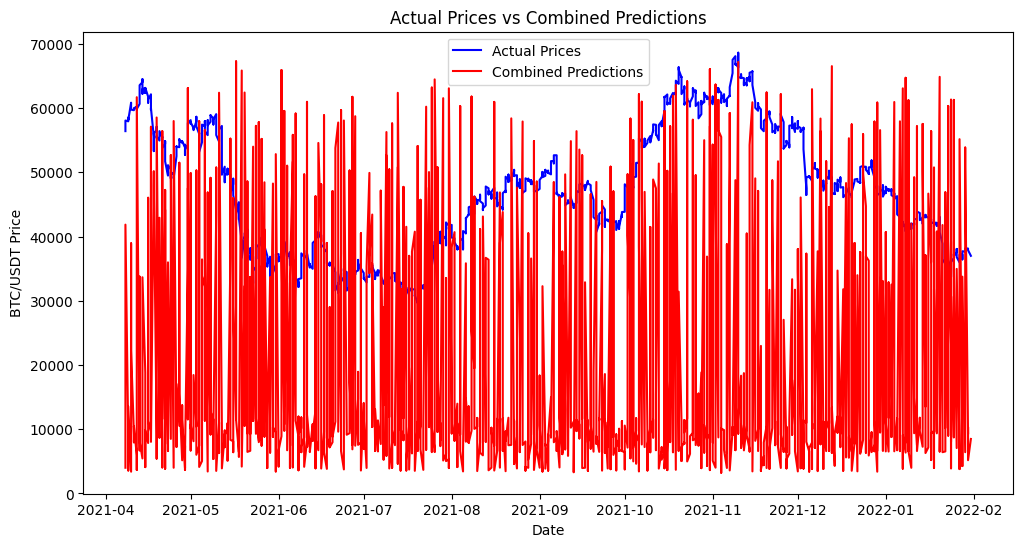

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test, label='Actual Prices', color='blue')
plt.plot(test['Date'], combined_preds, label='Combined Predictions', color='red')
plt.title('Actual Prices vs Combined Predictions')
plt.xlabel('Date')
plt.ylabel('BTC/USDT Price')
plt.legend()
plt.show()


In [ ]:
def perform_backtesting(actual_prices, predicted_prices):
    """
    Perform backtesting to evaluate the performance of a trading strategy.

    Parameters:
    - actual_prices: Actual prices of the asset (pandas Series or numpy array)
    - predicted_prices: Predicted prices from the trading strategy (pandas Series or numpy array)

    Returns:
    - backtest_results: Dictionary containing backtesting results
    """
    # Assuming equal allocation for simplicity (you can modify this based on your strategy)
    initial_balance = 100000  # Starting balance in USDT
    balance = initial_balance
    position = 0  # Number of units of the asset held
    transaction_cost_rate = 0.0015  # Transaction cost rate per trade (0.15%)

    # Lists to store trade-related information
    trades = []
    trade_dates = []
    trade_returns = []

    # Backtesting loop
    for i in range(1, len(actual_prices)):
        # Buy signal (predicted price is higher than the actual price)
        if predicted_prices.iloc[i] > actual_prices.iloc[i - 1]:
            if balance > 0:
                position = balance / actual_prices.iloc[i - 1]
                balance = 0
                trade_dates.append(actual_prices.index[i])
                trades.append('Buy')

        # Sell signal (predicted price is lower than the actual price)
        elif predicted_prices.iloc[i] < actual_prices.iloc[i - 1]:
            if position > 0:
                balance = position * actual_prices.iloc[i - 1]
                position = 0
                trade_dates.append(actual_prices.index[i])
                trades.append('Sell')

    # Calculate returns and additional metrics
    returns = balance + position * actual_prices.iloc[-1] - initial_balance
    total_trades = len(trades)
    win_trades = trades.count('Sell')
    loss_trades = trades.count('Buy')
    win_rate = win_trades / total_trades if total_trades > 0 else 0
    max_drawdown = (min(actual_prices) - max(actual_prices)) / max(actual_prices)

    backtest_results = {
        'Returns': returns,
        'Total Trades': total_trades,
        'Win Trades': win_trades,
        'Loss Trades': loss_trades,
        'Win Rate': win_rate,
        'Max Drawdown': max_drawdown
    }

    return backtest_results


# Example usage:
# Ensure 'y_test' and 'combined_preds' have the same index
y_test = pd.Series(y_test)
y_test.index = combined_preds.index

backtest_results = perform_backtesting(y_test, combined_preds)

# Display backtesting results
print(backtest_results)

{'Returns': -5009.485230779013, 'Total Trades': 184, 'Win Trades': 92, 'Loss Trades': 92, 'Win Rate': 0.5, 'Max Drawdown': -0.5678604778498723}


In [ ]:
returns=list()
for i in range(rf_preds.shape[0]-1):
  returns.append((rf_preds[i+1]-rf_preds[i])/rf_preds[i])
returns

[0.9264400652563034,
 4.438575993507918,
 -0.7941999018338114,
 -0.5854225142703173,
 0.41419891424842703,
 1.682863754352157,
 -0.7313637005507186,
 -0.07064235820600084,
 10.511989149000355,
 -0.428713359545834,
 -0.5892826941610302,
 -0.1293752874795516,
 0.09641335585770258,
 0.20063851165857735,
 -0.4309339452677901,
 -0.3858275088269393,
 0.6788640809360286,
 9.041931812094564,
 -0.892095823116027,
 0.46121910563510193,
 2.4702077858611333,
 -0.758711997592094,
 -0.3315921148291831,
 0.7566202302453395,
 -0.058833440190676656,
 2.7391388141735735,
 -0.4409236867598451,
 -0.7824622737523584,
 0.6190273676568834,
 0.4816741293311376,
 -0.20060693653058417,
 0.20093304241865134,
 3.883789569705183,
 -0.7556892783889201,
 -0.13729912522043586,
 4.056029331552376,
 0.1637051009090195,
 -0.8593442952826837,
 5.204619763838698,
 0.007291622697938455,
 -0.03020469508512326,
 -0.014335899687783038,
 -0.8080649294887727,
 -0.20237189590242954,
 -0.2617970669434707,
 9.79679920974668,
 -0.8

In [ ]:
returns=np.array(returns)
returns_positive=returns[returns>=0]

In [ ]:
returns_negative=returns[returns<0]

In [ ]:
risk_free_rate = 0.01

# Calculate additional risk management metrics
sharpe_ratio = (np.mean(returns) - risk_free_rate) / np.std(returns)

# Check if there are negative returns before calculating Sortino Ratio

sortino_ratio = (np.mean(returns) - risk_free_rate) / np.std(returns_negative)

# Display risk management metrics
print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Sortino Ratio: {sortino_ratio}')

Sharpe Ratio: 0.37512772120610777
Sortino Ratio: 3.4380957235162133


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'trading_signals' with relevant columns such as 'Date', 'Signal', etc.
# This is just an example, you should replace it with your actual trading signals DataFrame.

# Generate synthetic trading signals
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='B')
trading_signals = pd.DataFrame({
    'Date': dates,
    'Signal': np.random.choice([-1, 1], size=len(dates))
})

# Create a hypothetical portfolio with initial capital of $100,000
initial_capital = 100000
portfolio = pd.DataFrame({
    'Date': trading_signals['Date'],
    'Initial_Capital': initial_capital,
    'Signal': trading_signals['Signal'],
    'Price': np.random.uniform(50000, 60000, len(dates)),  # Replace with actual price data
})

# Calculate the portfolio value based on signals and price movements
portfolio['Shares'] = portfolio['Signal'].shift(1) * (initial_capital / portfolio['Price'].shift(1))
portfolio['Portfolio_Value'] = portfolio['Shares'] * portfolio['Price']

# Calculate daily profit and drawdown
portfolio['Profit'] = portfolio['Portfolio_Value'].diff()
portfolio['Drawdown'] = portfolio['Portfolio_Value'] - portfolio['Portfolio_Value'].cummax()

# Add hypothetical trade duration (random for demonstration)
portfolio['Trade_Duration'] = np.random.randint(1, 10, len(portfolio))

# Display the first few rows of the trading_results dataset
trading_results = portfolio[['Date', 'Initial_Capital', 'Portfolio_Value', 'Profit', 'Drawdown', 'Trade_Duration']]
print(trading_results.head())



        Date  Initial_Capital  Portfolio_Value         Profit       Drawdown  \
0 2022-01-03           100000              NaN            NaN            NaN   
1 2022-01-04           100000    -96394.897995            NaN       0.000000   
2 2022-01-05           100000     98042.123088  194437.021083       0.000000   
3 2022-01-06           100000   -104253.037696 -202295.160784 -202295.160784   
4 2022-01-07           100000   -111340.168091   -7087.130395 -209382.291179   

   Trade_Duration  
0               1  
1               3  
2               4  
3               2  
4               1  


In [ ]:
import numpy as np

# Assuming you have a DataFrame called 'trading_results' with relevant columns
# such as 'Trade_Type', 'Profit', 'Trade_Duration', etc.

# 1. Gross Profit
gross_profit = trading_results[trading_results['Profit'] > 0]['Profit'].sum()

# 2. Net Profit
net_profit = trading_results['Profit'].sum()

# 3. Total Closed Trades
total_trades = len(trading_results)

# 4. Win Rate (Profitability %)
win_rate = (trading_results['Profit'] > 0).sum() / total_trades * 100

# 5. Max Drawdown
max_drawdown = np.min(trading_results['Portfolio_Value']) - trading_results['Initial_Capital']

# 6. Gross Loss
gross_loss = trading_results[trading_results['Profit'] < 0]['Profit'].sum()

# 7. Average Winning Trade (in USDT)
avg_winning_trade = trading_results[trading_results['Profit'] > 0]['Profit'].mean()

# 8. Average Losing Trade (in USDT)
avg_losing_trade = trading_results[trading_results['Profit'] < 0]['Profit'].mean()

trading_results['Final_Portfolio_Value'] = trading_results['Initial_Capital'] + trading_results['Profit']

# 9. Buy and Hold Return of BTC
buy_and_hold_return = (trading_results['Final_Portfolio_Value'].iloc[-1] - trading_results['Initial_Capital']) / trading_results['Initial_Capital'] * 100

# 10. Largest Losing Trade (in USDT)
largest_losing_trade = trading_results[trading_results['Profit'] < 0]['Profit'].min()

# 11. Largest Winning Trade (in USDT)
largest_winning_trade = trading_results[trading_results['Profit'] > 0]['Profit'].max()

# 12. Sharpe Ratio
sharpe_ratio = (net_profit / trading_results['Profit'].std()) * np.sqrt(252)

# 13. Sortino Ratio
downside_deviation = trading_results[trading_results['Profit'] < 0]['Profit'].std()
sortino_ratio = (net_profit / downside_deviation) * np.sqrt(252)

# 14. Average Holding Duration per Trade
avg_holding_duration = trading_results['Trade_Duration'].mean()

# 15. Max Dip and Average Dip in Running Trade
max_dip = np.min(trading_results['Drawdown'])
avg_dip = trading_results['Drawdown'].mean()

# Display the calculated metrics
print("Gross Profit:", gross_profit)
print("Net Profit:", net_profit)
print("Total Closed Trades:", total_trades)
print("Win Rate (Profitability %):", win_rate)
print("Max Drawdown:", max_drawdown)
print("Gross Loss:", gross_loss)
print("Average Winning Trade (in USDT):", avg_winning_trade)
print("Average Losing Trade (in USDT):", avg_losing_trade)
print("Buy and Hold Return of BTC:", buy_and_hold_return)
print("Largest Losing Trade (in USDT):", largest_losing_trade)
print("Largest Winning Trade (in USDT):", largest_winning_trade)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Average Holding Duration per Trade:", avg_holding_duration)
print("Max Dip in Running Trade:", max_dip)
print("Average Dip in Running Trade:", avg_dip)

Gross Profit: 12765333.845315995
Net Profit: 197372.53238838172
Total Closed Trades: 260
Win Rate (Profitability %): 47.69230769230769
Max Drawdown: 0     -218200.973827
1     -218200.973827
2     -218200.973827
3     -218200.973827
4     -218200.973827
           ...      
255   -218200.973827
256   -218200.973827
257   -218200.973827
258   -218200.973827
259   -218200.973827
Name: Initial_Capital, Length: 260, dtype: float64
Gross Loss: -12567961.312927611
Average Winning Trade (in USDT): 102946.24068803221
Average Losing Trade (in USDT): -93790.75606662396
Buy and Hold Return of BTC: 0     -10.092996
1     -10.092996
2     -10.092996
3     -10.092996
4     -10.092996
         ...    
255   -10.092996
256   -10.092996
257   -10.092996
258   -10.092996
259   -10.092996
Name: Initial_Capital, Length: 260, dtype: float64
Largest Losing Trade (in USDT): -216527.02515756217
Largest Winning Trade (in USDT): 217605.6837912563
Sharpe Ratio: 22.80102838692837
Sortino Ratio: 32.851975183869165

<ipython-input-140-d663aa9e0e5e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_results['Final_Portfolio_Value'] = trading_results['Initial_Capital'] + trading_results['Profit']


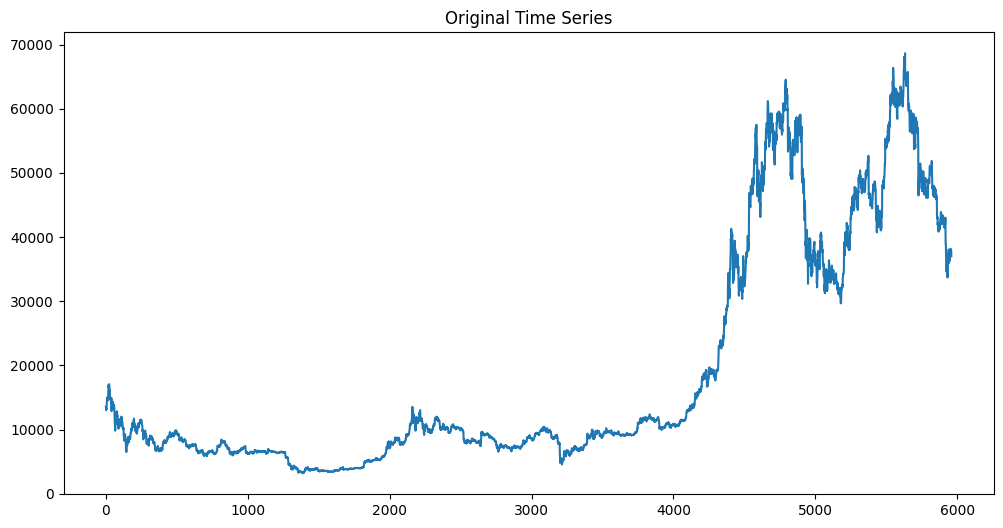

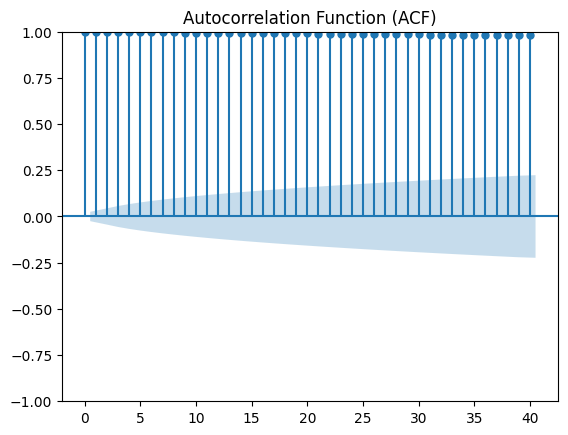

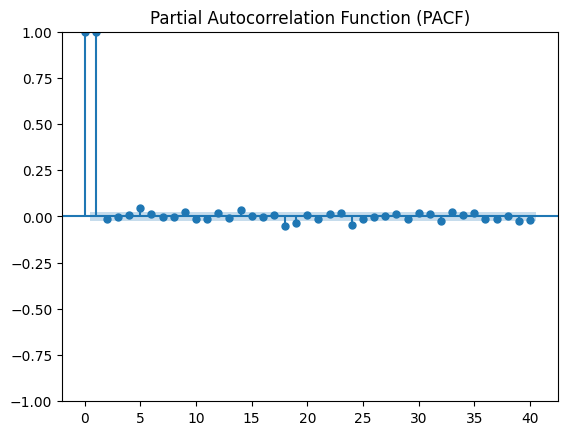

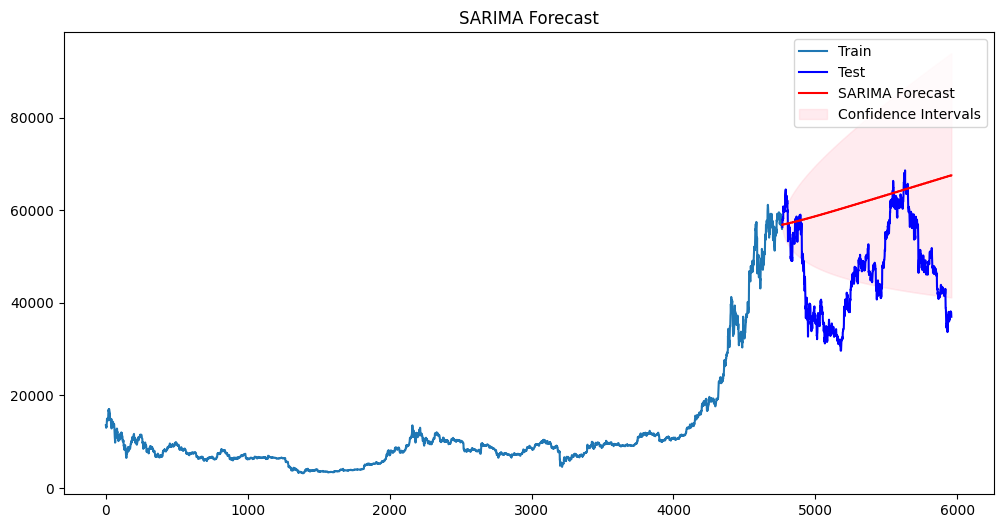

Root Mean Squared Error (RMSE): 17663.66949740038


In [ ]:
# SARIMA strategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a time series dataset named 'df' with a datetime index
# Replace 'close' with the actual column you want to model

# Visualize the time series
df['close'].plot(figsize=(12, 6))
plt.title('Original Time Series')
plt.show()

# Check ACF and PACF to determine the orders
plot_acf(df['close'],lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Choose orders based on ACF and PACF plots
p, d, q = 1, 1, 1  # Example orders
P, D, Q, s = 1, 1, 1, 12  # Example seasonal orders

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
sarima_model = SARIMAX(train['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

# Forecast future values
forecast_steps = len(test)
sarima_preds = sarima_fit.get_forecast(steps=forecast_steps)

# Confidence intervals for the forecast
confidence_intervals = sarima_preds.conf_int()

# Plot predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['close'], label='Train')
plt.plot(test.index, test['close'], label='Test', color='blue')
plt.plot(sarima_preds.predicted_mean.index, sarima_preds.predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Evaluate the model (you can use appropriate metrics based on your problem)
mse = ((sarima_preds.predicted_mean - test['close'])**2).mean()
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data (replace 'your_data.csv' with the actual file name)
# df = pd.read_csv('your_data.csv')
# df['datetime'] = pd.to_datetime(df['datetime_column'])
# df = df.set_index('datetime_column')

# Define the range of parameters
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Grid search over parameters
best_aic = np.inf
best_params = None

for param in seasonal_pdq:
    try:
        sarima_model = SARIMAX(df['close'], order=(1, 1, 1), seasonal_order=param)
        results = sarima_model.fit(disp=False, enforce_invertibility=False)

        # Choose the model with the lowest AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param

    except Exception as e:
        print(f"Error for SARIMA {param}: {e}")
        continue

print(f"Best SARIMA parameters: {best_params} with AIC {best_aic}")


Best SARIMA parameters: (0, 1, 1, 12) with AIC 91427.97018170988


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data (replace 'your_data.csv' with the actual file name)
# df = pd.read_csv('your_data.csv')
# df['datetime'] = pd.to_datetime(df['datetime_column'])
# df = df.set_index('datetime_column')

# Best SARIMA parameters obtained from the grid search
best_params = (0, 1, 1, 12)  # Replace with the actual best parameters

# Fit SARIMA model
sarima_model = SARIMAX(df['close'], order=(1, 1, 1), seasonal_order=best_params)
sarima_results = sarima_model.fit(disp=False)

# Print model summary
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                 5959
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -45709.985
Date:                            Fri, 12 Jan 2024   AIC                          91427.970
Time:                                    16:52:44   BIC                          91454.732
Sample:                                         0   HQIC                         91437.268
                                           - 5959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8225      0.124      6.653      0.000       0.580       1.065
ma.L1         -0.8324      0.121   

In [ ]:
validation=pd.read_csv('/content/btc_1h.csv')
validation['datetime'] = pd.to_datetime(validation['datetime'])

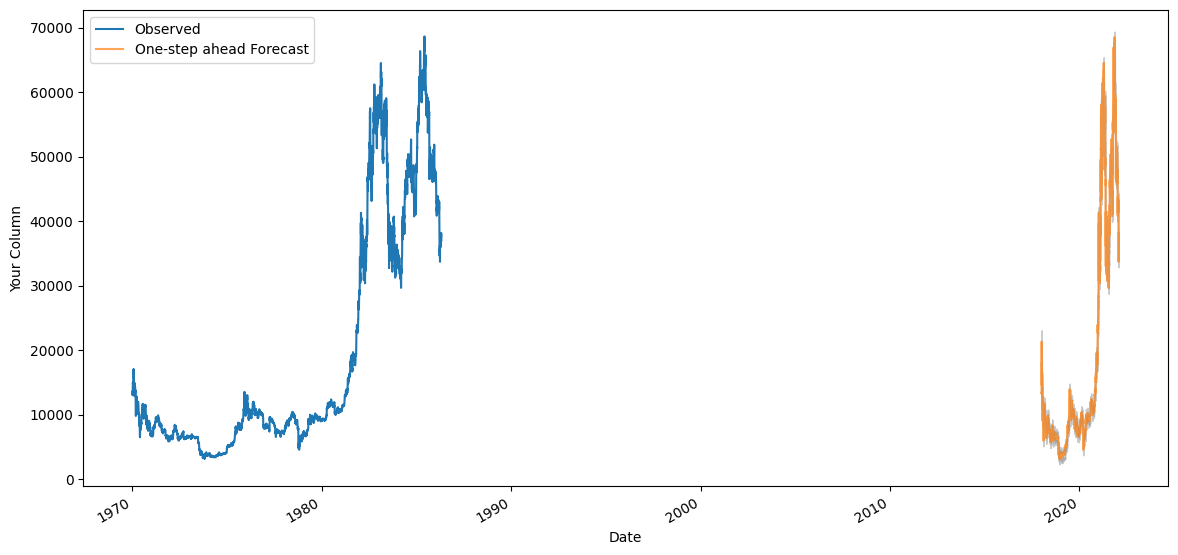

In [ ]:
'''# Not Accurate
# Make predictions on validation data
pred = sarima_results.get_prediction(start=validation.datetime[4], dynamic=False)
pred_ci = pred.conf_int()

# Plot the actual vs predicted values
ax = df['close'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Your Column')
plt.legend()
plt.show()'''


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


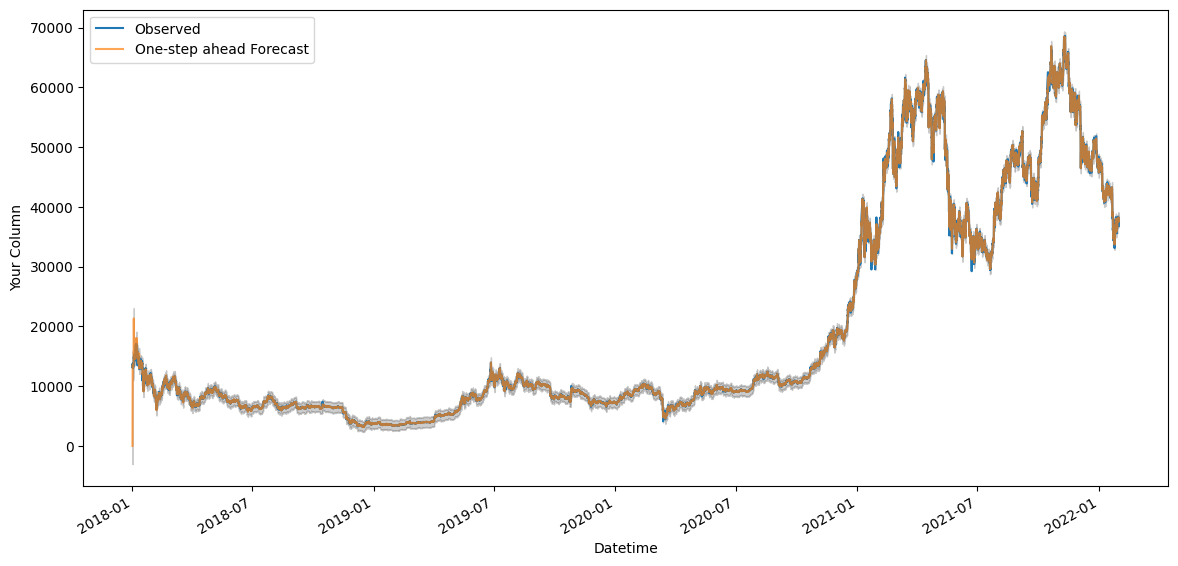

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your training time series data (replace 'train_data.csv' with the actual file name)
train_df = pd.read_csv('/content/btc_4h.csv')
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df = train_df.set_index('datetime')

# Best SARIMA parameters obtained from the grid search
best_params = (1, 1, 1, 12)  # Replace with the actual best parameters

# Fit SARIMA model to training data
sarima_model = SARIMAX(train_df['close'], order=(1, 1, 1), seasonal_order=best_params)
sarima_results = sarima_model.fit(disp=False)

# Load your validation time series data (replace 'validation_data.csv' with the actual file name)
validation_df = pd.read_csv('/content/btc_1h.csv')
validation_df['datetime'] = pd.to_datetime(validation_df['datetime'])
validation_df = validation_df.set_index('datetime')

# Make predictions on the validation data
pred = sarima_results.get_prediction(start=validation_df.index[0], end=validation_df.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# Plot the actual vs predicted values
ax = validation_df['close'].plot(label='Observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.2)

ax.set_xlabel('Datetime')  # Replace 'Date' with your actual datetime column label
ax.set_ylabel('Your Column')
plt.legend()
plt.show()

In [ ]:
ge are

In [ ]:
# Simulate trading with risk management for SARIMA
initial_balance_sarima = 100000  # Starting balance in USD
balance_sarima = initial_balance_sarima
position_sarima = 0

# Define risk management parameters for SARIMA
stop_loss_percent_sarima = 0.02
position_size_percent_sarima = 0.1
risk_reward_ratio_sarima = 2
max_drawdown_limit_sarima = 0.05  # 5% maximum drawdown limit

# Lists to store trade-related information
trades_sarima = []
trade_dates_sarima = []

# Backtesting loop with risk management for SARIMA
for i in range(1, len(test)):
    # Buy signal from SARIMA (replace 'Signal' with the actual column name)
    if test['Signal'].iloc[i] == 1:
        if balance_sarima > 0:
            position_sarima = min(balance_sarima / test['close'].iloc[i - 1], initial_balance_sarima * position_size_percent_sarima)
            balance_sarima -= position_sarima * test['close'].iloc[i - 1]
            trade_dates_sarima.append(test.index[i])
            trades_sarima.append('Buy')

    # Sell signal from SARIMA with risk management
    elif test['Signal'].iloc[i] == -1:
        if position_sarima > 0:
            stop_loss_price_sarima = test['close'].iloc[i - 1] * (1 - stop_loss_percent_sarima)
            target_profit_price_sarima = test['close'].iloc[i - 1] * (1 + risk_reward_ratio_sarima)

            # Execute stop-loss or take-profit based on prices
            if test['close'].iloc[i] < stop_loss_price_sarima or test['close'].iloc[i] > target_profit_price_sarima:
                balance_sarima += position_sarima * test['close'].iloc[i - 1]
                position_sarima = 0
                trade_dates_sarima.append(test.index[i])
                trades_sarima.append('Sell (Stop-Loss/Profit)')
            else:
                # Normal sell signal
                balance_sarima += position_sarima * test['close'].iloc[i - 1]
                position_sarima = 0
                trade_dates_sarima.append(test.index[i])
                trades_sarima.append('Sell')

        # Update maximum drawdown for SARIMA
        current_drawdown_sarima = (balance_sarima + position_sarima * test['close'].iloc[i] - initial_balance_sarima) / initial_balance_sarima
        if current_drawdown_sarima < max_drawdown_limit_sarima:
            max_drawdown_limit_sarima = current_drawdown_sarima

# Calculate returns and additional metrics for SARIMA
returns_sarima = balance_sarima + position_sarima * test['close'].iloc[-1] - initial_balance_sarima
total_trades_sarima = len(trades_sarima)
win_trades_sarima = trades_sarima.count('Sell')
loss_trades_sarima = trades_sarima.count('Buy')
win_rate_sarima = win_trades_sarima / total_trades_sarima if total_trades_sarima > 0 else 0
max_drawdown_sarima = (min(test['close']) - max(test['close'])) / max(test['close'])

backtest_results_sarima = {
    'Returns': returns_sarima,
    'Total Trades': total_trades_sarima,
    'Win Trades': win_trades_sarima,
    'Loss Trades': loss_trades_sarima,
    'Win Rate': win_rate_sarima,
    'Max Drawdown': max_drawdown_sarima
}

# Display backtesting results for SARIMA
print(backtest_results_sarima)


{'Returns': -12629.948998668406, 'Total Trades': 8, 'Win Trades': 3, 'Loss Trades': 4, 'Win Rate': 0.375, 'Max Drawdown': -0.5678604778498723}
